
# Diabetes Classification - Multiclass Prediction

This notebook demonstrates how to build a machine learning model to predict **diabetes type** (Type 1, Type 2, or Prediabetic) using patient health features.

We will go through:
1. Data Loading & Exploration
2. Preprocessing (encoding categorical variables)
3. Train-Test Split
4. Model Training (Logistic Regression, Random Forest)
5. Model Evaluation (Accuracy, Precision, Recall, F1-score, Confusion Matrix)
6. Model Saving


In [102]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

import joblib


In [103]:

# Load dataset
df = pd.read_csv("cleaned_data.csv")
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (16218, 14)


,Age,BMI,Insulin Levels,Blood Pressure,Blood Glucose Levels,Smoking Status,Family History,Target,Alcohol Consumption_High,Alcohol Consumption_Low,Alcohol Consumption_Moderate,Physical Activity_High,Physical Activity_Low,Physical Activity_Moderate
0,36,24,27,121,105,True,True,Prediabetic,True,False,False,True,False,False
1,7,16,8,100,121,True,False,Type 1 Diabetes,False,False,True,False,True,False
2,30,31,29,115,186,False,False,Type 2 Diabetes,False,True,False,False,False,True
3,29,23,8,91,114,True,False,Type 1 Diabetes,False,False,True,False,True,False
4,59,28,22,128,113,True,False,Prediabetic,False,False,True,False,True,False


Target
Type 1 Diabetes    5446
Type 2 Diabetes    5397
Prediabetic        5375
Name: count, dtype: int64


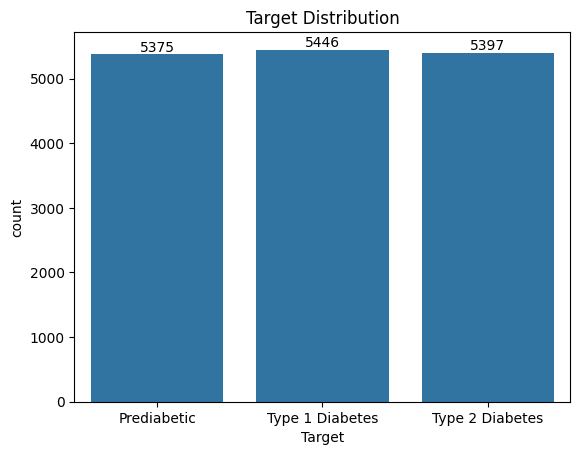

In [104]:

# Check distribution of target variable
print(df['Target'].value_counts())
tx = sns.countplot(data=df, x='Target')
plt.title("Target Distribution")

for bars in tx.containers:
    tx.bar_label(bars)
plt.show()


In [105]:

# Encode categorical columns (bool to int, target to numeric labels) 1-> True, 0-> False
df_encoded = df.copy()

# # Encode boolean as int
for col in df_encoded.select_dtypes(include=['bool']).columns:
    df_encoded[col] = df_encoded[col].astype(int)

# Encode target labels
le = LabelEncoder()
df_encoded['Target'] = le.fit_transform(df_encoded['Target'])

print("Label Mapping:")
for i, cls in enumerate(le.classes_):
    print(i, "->", cls)

df_encoded.head()


Label Mapping:
0 -> Prediabetic
1 -> Type 1 Diabetes
2 -> Type 2 Diabetes


,Age,BMI,Insulin Levels,Blood Pressure,Blood Glucose Levels,Smoking Status,Family History,Target,Alcohol Consumption_High,Alcohol Consumption_Low,Alcohol Consumption_Moderate,Physical Activity_High,Physical Activity_Low,Physical Activity_Moderate
0,36,24,27,121,105,1,1,0,1,0,0,1,0,0
1,7,16,8,100,121,1,0,1,0,0,1,0,1,0
2,30,31,29,115,186,0,0,2,0,1,0,0,0,1
3,29,23,8,91,114,1,0,1,0,0,1,0,1,0
4,59,28,22,128,113,1,0,0,0,0,1,0,1,0


In [106]:

X = df_encoded.drop("Target", axis=1)
y = df_encoded["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (12974, 13)
Test size: (3244, 13)


In [107]:
X_train

,Age,BMI,Insulin Levels,Blood Pressure,Blood Glucose Levels,Smoking Status,Family History,Alcohol Consumption_High,Alcohol Consumption_Low,Alcohol Consumption_Moderate,Physical Activity_High,Physical Activity_Low,Physical Activity_Moderate
8271,43,38,33,119,138,0,0,1,0,0,0,1,0
10100,35,32,24,131,194,1,1,1,0,0,1,0,0
11532,49,30,12,114,148,1,0,1,0,0,1,0,0
5179,17,19,16,102,130,1,0,0,1,0,0,0,1
10858,68,32,41,113,178,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,33,28,27,147,190,0,0,0,0,1,0,1,0
15981,48,38,13,141,171,1,0,1,0,0,1,0,0
8908,40,29,26,122,147,0,1,0,1,0,1,0,0
11310,27,17,10,109,100,0,1,1,0,0,0,0,1


Logistic Regression Report:
                 precision    recall  f1-score   support

    Prediabetic       1.00      1.00      1.00      1075
Type 1 Diabetes       1.00      1.00      1.00      1089
Type 2 Diabetes       1.00      1.00      1.00      1080

       accuracy                           1.00      3244
      macro avg       1.00      1.00      1.00      3244
   weighted avg       1.00      1.00      1.00      3244

Logistic Regression Accuracy: 0.9984586929716399


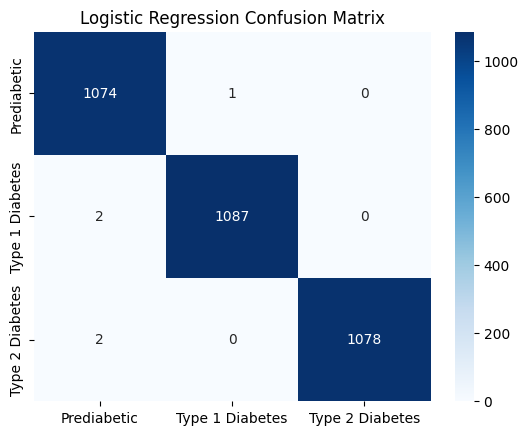

In [108]:

# Logistic Regression (baseline)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=500, multi_class="multinomial")
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log, target_names=le.classes_))

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.show()


Random Forest Report:
                 precision    recall  f1-score   support

    Prediabetic       1.00      1.00      1.00      1075
Type 1 Diabetes       1.00      1.00      1.00      1089
Type 2 Diabetes       1.00      1.00      1.00      1080

       accuracy                           1.00      3244
      macro avg       1.00      1.00      1.00      3244
   weighted avg       1.00      1.00      1.00      3244



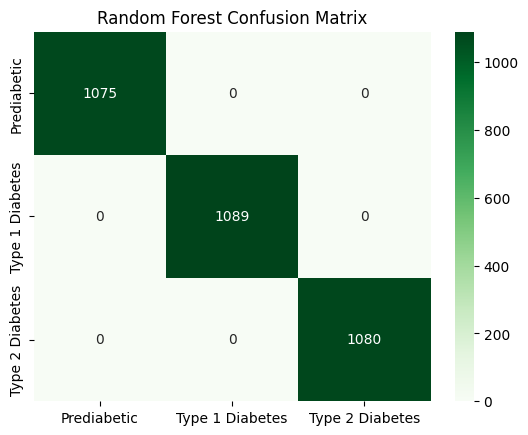

In [109]:

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Random Forest Confusion Matrix")
plt.show()


In [110]:
X_test.iloc[36]

Age                              51
BMI                              25
Insulin Levels                   28
Blood Pressure                  122
Blood Glucose Levels            111
Smoking Status                    0
Family History                    1
Alcohol Consumption_High          1
Alcohol Consumption_Low           0
Alcohol Consumption_Moderate      0
Physical Activity_High            0
Physical Activity_Low             1
Physical Activity_Moderate        0
Name: 9497, dtype: int64

In [111]:
number = 36
test = [X_test.iloc[number]]
pre_rf = rf.predict(test)
pre_lr = log_model.predict(scaler.transform(test))

li_pre = [pre_rf[0], pre_lr[0],y_test.iloc[843]]

def predictions(x):
    if x == 0:
        return "Prediabetic"
    elif x == 1:
        return "Type 1 Diabetic"
    else:
        return "Type 2 Diabetic"

print(f"Random Forest Model Prediction : {predictions(pre_rf[0])}")
print(f"Logistic Regression Model Prediction : {predictions(pre_lr[0])}")
print(f"Actual Label : {predictions(y_test.iloc[number])}")

Random Forest Model Prediction : Prediabetic
Logistic Regression Model Prediction : Prediabetic
Actual Label : Prediabetic


In [118]:
Age = int(input("Enter Age: "))
BMI = int(input("Enter BMI: "))
Insulin_Levels = int(input("Enter Insulin Levels: "))
Blood_Pressure = int(input("Enter Blood Pressure: "))
Blood_Glucose_Levels = int(input("Enter Blood Glucose Levels: "))
Smoking_Status = int(input("Enter Smoking Status (1 for Yes, 0 for No): "))
Family_History = int(input("Enter Family History (1 for Yes, 0 for No): "))
Alcohol_Consumption = int(input("Enter Alcohol Consumption (0:Low, 1:Moderate, 2:High): "))
if Alcohol_Consumption == 0:
    Alcohol_Consumption_Low = 1
    Alcohol_Consumption_Moderate = 0
    Alcohol_Consumption_High = 0
elif Alcohol_Consumption == 1:
    Alcohol_Consumption_Low = 0
    Alcohol_Consumption_Moderate = 1
    Alcohol_Consumption_High = 0
else:
    Alcohol_Consumption_Low = 0
    Alcohol_Consumption_Moderate = 0
    Alcohol_Consumption_High = 1
    
Physical_Activity = int(input("Rate Your Physical Activity (0-2):0:Low, 1:Moderate, 2:High :  "))
if Physical_Activity == 0:
    Physical_Activity_Low = 1
    Physical_Activity_Moderate = 0
    Physical_Activity_High = 0
elif Physical_Activity == 1:
    Physical_Activity_Low = 0
    Physical_Activity_Moderate = 1
    Physical_Activity_High = 0
else:
    Physical_Activity_Low = 0
    Physical_Activity_Moderate = 0
    Physical_Activity_High = 1
    
input_data = [[Age, BMI, Insulin_Levels, Blood_Pressure, Blood_Glucose_Levels, Smoking_Status, Family_History, Alcohol_Consumption_Low, Alcohol_Consumption_Moderate, Alcohol_Consumption_High, Physical_Activity_Low, Physical_Activity_Moderate, Physical_Activity_High]]
pre_rf = rf.predict(input_data)
pre_lr = log_model.predict(scaler.transform(input_data))



def predictions(x):
    if x == 0:
        return "Prediabetic"
    elif x == 1:
        return "Type 1 Diabetic"
    else:
        return "Type 2 Diabetic"

print(f"Random Forest Model Prediction : {predictions(pre_rf[0])}")
print(f"Logistic Regression Model Prediction : {predictions(pre_lr[0])}")


Random Forest Model Prediction : Prediabetic
Logistic Regression Model Prediction : Prediabetic


In [120]:
def get_input(prompt, type_=int):
    return type_(input(prompt))

def one_hot_encode(value, categories):
    return [1 if i == value else 0 for i in range(categories)]

# Collect numeric inputs
Age = get_input("Enter Age: ")
BMI = get_input("Enter BMI: ")
Insulin_Levels = get_input("Enter Insulin Levels: ")
Blood_Pressure = get_input("Enter Blood Pressure: ")
Blood_Glucose_Levels = get_input("Enter Blood Glucose Levels: ")
Smoking_Status = get_input("Enter Smoking Status (1 for Yes, 0 for No): ")
Family_History = get_input("Enter Family History (1 for Yes, 0 for No): ")

# One-hot encode categorical inputs
Alcohol_Consumption = get_input("Enter Alcohol Consumption (0:Low, 1:Moderate, 2:High): ")
Alcohol_Consumption_encoded = one_hot_encode(Alcohol_Consumption, 3)

Physical_Activity = get_input("Rate Your Physical Activity (0:Low, 1:Moderate, 2:High): ")
Physical_Activity_encoded = one_hot_encode(Physical_Activity, 3)

# Combine all inputs
input_data = [[Age, BMI, Insulin_Levels, Blood_Pressure, Blood_Glucose_Levels, 
               Smoking_Status, Family_History, *Alcohol_Consumption_encoded, *Physical_Activity_encoded]]

# Make predictions
pre_rf = rf.predict(input_data)
pre_lr = log_model.predict(scaler.transform(input_data))

def predictions(x):
    return ["Prediabetic", "Type 1 Diabetic", "Type 2 Diabetic"][x]

print(f"Random Forest Model Prediction : {predictions(pre_rf[0])}")
print(f"Logistic Regression Model Prediction : {predictions(pre_lr[0])}")


Random Forest Model Prediction : Prediabetic
Logistic Regression Model Prediction : Prediabetic


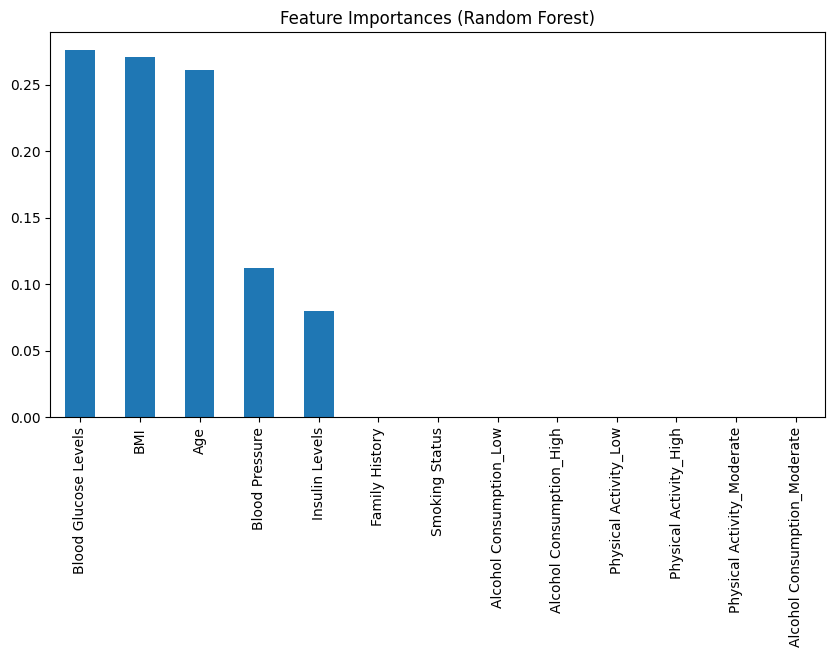

In [115]:

# Feature importance (Random Forest)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importances (Random Forest)")
plt.show()


In [116]:
joblib.dump(rf, 'model1.pkl')

['rndom_forst_model.pkl']

In [117]:
joblib.dump(log_model, 'model2.pkl')

['logistc_regr_model.pkl']

In [121]:
import pickle

pickle.dump(rf, open('model1.pkl', 'wb'))
pickle.dump(log_model, open('model2.pkl', 'wb'))